In [401]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [154]:
macro = pd.read_csv('macro.csv')

In [155]:
macro

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Check CPI data in dataset Macro

#### Extract year from timestamp

In [156]:
macro['timestamp'] = pd.to_datetime(macro['timestamp'])

In [158]:
macro['year'] = macro['timestamp'].dt.year

#### Check data in cycle for every year and month 

In [171]:
year = 2010

for i in range(7): 
    print(year + i)
    print(macro[macro.year == year + i]['cpi'].value_counts(dropna=False))
    print('-------------------------------------')

2010
NaN      31
317.7    31
320.7    31
323.6    31
324.8    31
329.3    31
333.6    31
319.8    30
322.3    30
326.6    30
330.9    30
315.1    28
Name: cpi, dtype: int64
-------------------------------------
2011
354.0    62
353.2    60
337.2    31
347.9    31
351.5    31
353.0    31
356.2    31
350.0    30
354.7    30
345.2    28
Name: cpi, dtype: int64
-------------------------------------
2012
357.8    31
360.9    31
364.1    31
369.2    31
373.8    31
376.2    31
379.2    31
363.0    30
366.0    30
374.1    30
377.9    30
359.5    29
Name: cpi, dtype: int64
-------------------------------------
2013
381.2    31
387.1    31
390.4    31
394.7    31
397.9    31
399.3    31
403.9    31
388.5    30
393.0    30
398.5    30
401.6    30
384.9    28
Name: cpi, dtype: int64
-------------------------------------
2014
405.9    31
411.2    31
419.1    31
425.5    31
427.5    31
431.4    31
440.5    31
415.3    30
422.8    30
428.6    30
434.9    30
408.3    28
Name: cpi, dtype: int64
-------

In [189]:
CPI = macro[['timestamp', 'cpi', 'year']]

In [190]:
CPI = CPI[CPI.year > 2010]
CPI

,timestamp,cpi,year
365,2011-01-01,337.2,2011
366,2011-01-02,337.2,2011
367,2011-01-03,337.2,2011
368,2011-01-04,337.2,2011
369,2011-01-05,337.2,2011
...,...,...,...
2479,2016-10-15,531.0,2016
2480,2016-10-16,531.0,2016
2481,2016-10-17,531.0,2016
2482,2016-10-18,531.0,2016


In [191]:
CPI = CPI.drop('year', axis=1)
CPI

,timestamp,cpi
365,2011-01-01,337.2
366,2011-01-02,337.2
367,2011-01-03,337.2
368,2011-01-04,337.2
369,2011-01-05,337.2
...,...,...
2479,2016-10-15,531.0
2480,2016-10-16,531.0
2481,2016-10-17,531.0
2482,2016-10-18,531.0


## Make correct price

In [443]:
data = pd.read_csv('sample.csv', sep=';')

In [444]:
data

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,2011-08-20,43.00,27.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,9,4,0,13,22,1,0,52,4,5850000.00
1,2011-08-23,34.00,19.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,15,3,0,15,29,1,10,66,14,6000000.00
2,2011-08-27,43.00,29.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,10,3,0,11,27,0,4,67,10,5700000.00
3,2011-09-01,89.00,50.0,9.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,11,2,1,4,4,0,0,26,3,13100000.00
4,2011-09-05,77.00,77.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,319,108,17,135,236,2,91,195,14,16331452.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,2016-05-26,52.20,31.8,10.0,12.0,5.0,1973.0,2.0,9.1,2.0,...,28,1,1,8,39,2,3,75,12,7118500.41
38129,2016-05-28,54.09,30.0,14.0,0.0,1.0,1980.0,2.0,0.0,2.0,...,2,1,0,0,10,0,0,0,0,7118500.41
38130,2016-05-30,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,...,371,141,26,150,249,2,105,203,13,7118500.41
38131,2016-05-30,34.80,19.8,8.0,9.0,5.0,1977.0,1.0,6.4,2.0,...,7,2,0,5,11,0,2,43,10,7118500.41


In [445]:
data.rename(columns={'price_doc': 'price'}, inplace=True)

In [446]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [447]:
data['year'] = data['timestamp'].dt.year

#### Check values in dataset by year   

In [174]:
data.groupby('year').mean()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price
year,,,,,,,,,,,,,,,,,,,,,
2011,49.134130,29.913679,6.671979,12.000000,1.000000,1980.000000,2.000000,6.000000,2.000000,9.801598e+06,...,33.601594,10.750332,1.666667,17.164675,33.288181,0.438247,9.540505,66.638778,7.827357,5.929668e+06
2012,54.310808,32.449266,7.846456,12.000000,1.000000,1980.000000,2.000000,6.000000,2.000000,1.709488e+07,...,33.107874,11.087001,1.816698,15.550527,31.225046,0.505476,8.841290,55.267204,6.201075,6.354435e+06
2013,53.562422,34.475307,8.009777,12.280521,1.427300,4466.289922,1.949361,6.666458,2.089621,1.762380e+07,...,29.159438,9.693031,1.585485,13.783530,27.949987,0.459514,7.713587,49.514916,5.654675,6.712150e+06
2014,54.075026,33.092373,7.476651,12.529132,1.808081,1900.378934,1.898112,6.097863,2.097789,1.741233e+07,...,31.883546,10.689870,1.754575,15.025911,30.250988,0.414581,8.703484,52.847899,6.059947,7.449468e+06
2015,55.489438,34.003276,7.624024,12.621856,1.902139,1839.466898,1.909222,6.597171,1.928448,2.038924e+07,...,36.043654,12.496964,2.066060,16.599017,32.982509,0.407054,9.706418,53.947095,5.925846,7.617326e+06
2016,53.638812,31.477615,7.651268,12.613106,1.788602,1860.324881,1.897565,7.193020,2.038915,1.604091e+07,...,37.130555,12.586242,2.111474,17.205624,33.860658,0.431584,10.001255,58.193071,6.562390,7.118500e+06


#### Create correct price with influence CPI

In [448]:
data = pd.merge(data, CPI, on='timestamp')

In [449]:
data['price'] = (data['price'] / data['cpi'] * 100).round(2)

In [450]:
data['price']

0        1652542.37
1        1694915.25
2        1610169.49
3        3708946.77
4        4623853.91
            ...    
38128    1360569.65
38129    1360569.65
38130    1360569.65
38131    1360569.65
38132    1360569.65
Name: price, Length: 38133, dtype: float64

In [451]:
data.drop('cpi', axis=1, inplace=True) 

In [452]:
train = data[data.timestamp < '2015-07-01']
train

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
0,2011-08-20,43.0,27.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,13,22,1,0,52,4,1652542.37,2011
1,2011-08-23,34.0,19.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,15,29,1,10,66,14,1694915.25,2011
2,2011-08-27,43.0,29.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,11,27,0,4,67,10,1610169.49,2011
3,2011-09-01,89.0,50.0,9.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,2,1,4,4,0,0,26,3,3708946.77,2011
4,2011-09-05,77.0,77.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,108,17,135,236,2,91,195,14,4623853.91,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,44.0,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,5,0,15,26,1,2,84,6,1511746.68,2015
30467,2015-06-30,86.0,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,128,24,98,182,1,82,171,15,5107252.30,2015
30468,2015-06-30,45.0,30.0,10.0,20.0,1.0,1980.0,1.0,1.0,1.0,...,1,0,2,12,0,1,11,1,1424097.85,2015
30469,2015-06-30,64.0,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,1,1,6,31,1,4,65,7,2757916.24,2015


In [453]:
test = data[data.timestamp >= '2015-07-01']
test

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
30471,2015-07-01,39.00,20.7,2.0,9.0,1.0,1998.0,1.0,8.9,3.0,...,0,0,1,10,1,0,14,1,1451274.29,2015
30472,2015-07-01,79.20,30.0,8.0,17.0,1.0,0.0,3.0,1.0,1.0,...,1,0,2,11,0,1,12,1,1451274.29,2015
30473,2015-07-01,40.50,25.1,3.0,5.0,2.0,1960.0,2.0,4.8,2.0,...,4,0,10,21,0,10,71,11,1451274.29,2015
30474,2015-07-01,62.80,36.0,17.0,17.0,1.0,2016.0,2.0,62.8,3.0,...,2,0,0,10,0,0,2,0,1451274.29,2015
30475,2015-07-01,40.00,40.0,17.0,17.0,1.0,0.0,1.0,1.0,1.0,...,1,0,2,12,0,1,11,1,1451274.29,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38128,2016-05-26,52.20,31.8,10.0,12.0,5.0,1973.0,2.0,9.1,2.0,...,1,1,8,39,2,3,75,12,1360569.65,2016
38129,2016-05-28,54.09,30.0,14.0,0.0,1.0,1980.0,2.0,0.0,2.0,...,1,0,0,10,0,0,0,0,1360569.65,2016
38130,2016-05-30,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,...,141,26,150,249,2,105,203,13,1360569.65,2016
38131,2016-05-30,34.80,19.8,8.0,9.0,5.0,1977.0,1.0,6.4,2.0,...,2,0,5,11,0,2,43,10,1360569.65,2016


In [454]:
train.price.describe()

count    3.047100e+04
mean     1.730225e+06
std      1.151249e+06
min      2.365184e+04
25%      1.154303e+06
50%      1.527082e+06
75%      1.994163e+06
max      3.051665e+07
Name: price, dtype: float64

#### IQR method to find outliers of price

In [455]:
q1 = train['price'].quantile(0.25)
q3 = train['price'].quantile(0.75)
iqr = q3 - q1
median = train['price'].median()

In [456]:
lower_bound = median - 1.5*iqr
upper_bound = median + 1.5*iqr
outliers = (train['price'] < lower_bound) | (train['price'] > upper_bound)

In [457]:
train[outliers]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
3,2011-09-01,89.0,50.0,9.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,2,1,4,4,0,0,26,3,3708946.77,2011
4,2011-09-05,77.0,77.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,108,17,135,236,2,91,195,14,4623853.91,2011
31,2011-09-27,81.0,46.0,24.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,5,0,10,10,0,1,50,4,5181200.45,2011
58,2011-10-04,75.0,46.0,12.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,12,1,12,28,0,4,97,14,2818696.88,2011
60,2011-10-04,96.0,51.0,16.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,1,0,4,6,0,1,24,3,3966005.67,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30434,2015-06-26,76.0,44.0,6.0,12.0,1.0,2006.0,3.0,10.0,3.0,...,31,4,64,100,1,43,120,10,3513789.58,2015
30438,2015-06-26,88.0,58.0,7.0,8.0,2.0,1960.0,3.0,8.0,3.0,...,62,12,51,110,1,54,144,11,4085801.84,2015
30441,2015-06-27,113.0,1.0,26.0,26.0,1.0,2015.0,4.0,1.0,1.0,...,141,26,150,249,2,105,203,13,5115280.90,2015
30456,2015-06-29,52.0,30.0,8.0,14.0,1.0,1992.0,2.0,8.0,2.0,...,4,1,5,7,0,1,42,6,204290.09,2015


In [458]:
train = train[~outliers]
train

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
0,2011-08-20,43.0,27.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,13,22,1,0,52,4,1652542.37,2011
1,2011-08-23,34.0,19.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,15,29,1,10,66,14,1694915.25,2011
2,2011-08-27,43.0,29.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,11,27,0,4,67,10,1610169.49,2011
5,2011-09-06,67.0,46.0,14.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,14,1,53,78,1,20,113,17,2576443.94,2011
6,2011-09-08,25.0,14.0,10.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,16,3,38,80,1,27,127,8,1557191.39,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30465,2015-06-30,52.0,30.0,13.0,17.0,1.0,1980.0,2.0,1.0,1.0,...,141,26,150,249,2,105,203,13,1379071.30,2015
30466,2015-06-30,44.0,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,5,0,15,26,1,2,84,6,1511746.68,2015
30468,2015-06-30,45.0,30.0,10.0,20.0,1.0,1980.0,1.0,1.0,1.0,...,1,0,2,12,0,1,11,1,1424097.85,2015
30469,2015-06-30,64.0,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,1,1,6,31,1,4,65,7,2757916.24,2015


In [459]:
train.shape

(26465, 288)

In [460]:
def get_train_corr(df):
    train = df[df.timestamp < '2015-07-01']
    return train.corr()

In [461]:
df = pd.concat([train, test], ignore_index=True)
df

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
0,2011-08-20,43.00,27.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,13,22,1,0,52,4,1652542.37,2011
1,2011-08-23,34.00,19.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,15,29,1,10,66,14,1694915.25,2011
2,2011-08-27,43.00,29.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,11,27,0,4,67,10,1610169.49,2011
3,2011-09-06,67.00,46.0,14.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,14,1,53,78,1,20,113,17,2576443.94,2011
4,2011-09-08,25.00,14.0,10.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,16,3,38,80,1,27,127,8,1557191.39,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,2016-05-26,52.20,31.8,10.0,12.0,5.0,1973.0,2.0,9.1,2.0,...,1,1,8,39,2,3,75,12,1360569.65,2016
34123,2016-05-28,54.09,30.0,14.0,0.0,1.0,1980.0,2.0,0.0,2.0,...,1,0,0,10,0,0,0,0,1360569.65,2016
34124,2016-05-30,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,...,141,26,150,249,2,105,203,13,1360569.65,2016
34125,2016-05-30,34.80,19.8,8.0,9.0,5.0,1977.0,1.0,6.4,2.0,...,2,0,5,11,0,2,43,10,1360569.65,2016


# Including features

In [462]:
def group_cols_by_mean(df, columns, name_col):
    df[name_col] = 0 
    
    for col in columns:
        df[name_col] += df[col]
    
    df[name_col] /= len(columns)
    df.drop(columns=columns, axis=1,inplace=True)

In [463]:
columns = []

## Square

In [464]:
square_columns = df.columns[df.columns.str.contains('sq$')]

In [465]:
square = df[square_columns]
square

,full_sq,life_sq,kitch_sq
0,43.00,27.0,6.0
1,34.00,19.0,6.0
2,43.00,29.0,6.0
3,67.00,46.0,6.0
4,25.00,14.0,6.0
...,...,...,...
34122,52.20,31.8,9.1
34123,54.09,30.0,0.0
34124,41.08,1.0,1.0
34125,34.80,19.8,6.4


In [466]:
price[square_columns]

full_sq     0.159857
life_sq     0.058259
kitch_sq    0.018257
Name: price, dtype: float64

#### Conclusion: use only full_sq

In [467]:
columns.append('full_sq')

In [468]:
df.full_sq.describe()

count    34127.000000
mean        51.351256
std         34.550678
min          0.000000
25%         38.000000
50%         46.000000
75%         60.060000
max       5326.000000
Name: full_sq, dtype: float64

In [469]:
df = df[(df['full_sq'].quantile(.99) > df['full_sq']) & (df['full_sq'] > df['full_sq'].quantile(.01))]

In [470]:
df.shape

(33362, 288)

## Num rooms

In [471]:
df["num_room"].value_counts()

2.0     18640
1.0      9843
3.0      4646
4.0       206
5.0        12
0.0         8
6.0         3
19.0        2
10.0        2
Name: num_room, dtype: int64

#### Drop all rows where number of room is less than 5  

In [476]:
df = df[(df["num_room"] < 5) & (df["num_room"] > 0)]

In [477]:
df["num_room"].value_counts()

2.0    18640
1.0     9843
3.0     4646
4.0      206
Name: num_room, dtype: int64

In [478]:
df.shape

(33335, 288)

In [479]:
columns.append('num_room')

## State

In [480]:
df['state'].value_counts()

2.0     20101
3.0      6498
1.0      6390
4.0       345
33.0        1
Name: state, dtype: int64

#### Drop state '33'. '4' - best , '1' - worst 

In [481]:
df = df[df.state <= 4]

In [482]:
df.shape

(33334, 288)

In [483]:
columns.append('state')

## Population

In [484]:
def findOutliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    median = df[column].median()
    
    lower_bound = median - 1.5*iqr
    upper_bound = median + 1.5*iqr
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

In [485]:
corr_matrix = get_train_corr(df)

In [486]:
high_corr(corr_matrix, "work_all")

work_all                             1.000000
work_male                            0.997634
work_female                          0.997572
raion_popul                          0.996833
0_17_all                             0.960266
0_17_male                            0.959638
0_17_female                          0.959243
young_all                            0.958215
young_male                           0.957748
0_13_all                             0.957216
young_female                         0.956903
0_13_male                            0.956823
0_13_female                          0.955687
7_14_male                            0.955323
7_14_all                             0.954848
children_school                      0.954848
children_preschool                   0.954392
0_6_all                              0.954392
0_6_male                             0.953881
0_6_female                           0.953302
7_14_female                          0.951349
ekder_female                      

#### Conclusion: use work_all without other

In [487]:
columns.append('work_all')

In [488]:
df.work_all.describe()

count     33334.000000
mean      53012.989200
std       38019.241045
min        1633.000000
25%       13996.000000
50%       52030.000000
75%       77062.000000
max      161290.000000
Name: work_all, dtype: float64

In [489]:
df[findOutliers(df, 'work_all')]['work_all'].value_counts()

161290    570
Name: work_all, dtype: int64

In [490]:
df[findOutliers(df, 'work_all')]

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
13,2011-09-20,51.0,31.0,15.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,1,0,9,21,0,1,53,9,523782.56,2011
32,2011-09-28,39.0,20.0,1.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,1,0,9,21,0,1,53,9,1373159.68,2011
162,2011-10-22,80.0,48.0,11.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,1,0,10,28,0,2,60,11,566572.24,2011
212,2011-10-29,48.0,10.0,9.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,2,0,9,28,0,7,66,13,566572.24,2011
245,2011-11-02,38.0,19.0,7.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,1,0,10,24,0,2,55,10,1621088.24,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33896,2016-04-29,38.2,19.9,2.0,22.0,1.0,2000.0,1.0,10.4,2.0,...,1,0,9,24,0,3,56,9,1366577.16,2016
34025,2016-05-11,52.1,30.6,8.0,12.0,1.0,2001.0,2.0,9.7,3.0,...,1,0,9,25,0,3,50,7,1360569.65,2016
34046,2016-05-13,54.4,32.3,13.0,16.0,1.0,1999.0,2.0,9.1,3.0,...,1,0,10,23,0,3,49,8,1360569.65,2016
34063,2016-05-17,74.6,43.7,17.0,17.0,1.0,1985.0,3.0,10.2,3.0,...,2,0,11,32,0,6,61,10,1360569.65,2016


In [491]:
outliers = findOutliers(df, 'work_all')

In [492]:
df_test = df[~outliers]
df_test

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year
0,2011-08-20,43.00,27.0,4.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,13,22,1,0,52,4,1652542.37,2011
1,2011-08-23,34.00,19.0,3.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,15,29,1,10,66,14,1694915.25,2011
2,2011-08-27,43.00,29.0,2.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,3,0,11,27,0,4,67,10,1610169.49,2011
3,2011-09-06,67.00,46.0,14.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,14,1,53,78,1,20,113,17,2576443.94,2011
5,2011-09-09,44.00,44.0,5.0,12.0,1.0,1980.0,2.0,6.0,2.0,...,4,0,11,18,1,0,47,4,566251.42,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,2016-05-26,52.20,31.8,10.0,12.0,5.0,1973.0,2.0,9.1,2.0,...,1,1,8,39,2,3,75,12,1360569.65,2016
34123,2016-05-28,54.09,30.0,14.0,0.0,1.0,1980.0,2.0,0.0,2.0,...,1,0,0,10,0,0,0,0,1360569.65,2016
34124,2016-05-30,41.08,1.0,12.0,1.0,1.0,1.0,1.0,1.0,1.0,...,141,26,150,249,2,105,203,13,1360569.65,2016
34125,2016-05-30,34.80,19.8,8.0,9.0,5.0,1977.0,1.0,6.4,2.0,...,2,0,5,11,0,2,43,10,1360569.65,2016


In [493]:
df_test.work_all.describe()

count     32764.000000
mean      51129.278537
std       35540.021374
min        1633.000000
25%       13996.000000
50%       51445.000000
75%       75334.000000
max      140182.000000
Name: work_all, dtype: float64

## Distance

In [494]:
df.columns[df.columns.str.contains('km$')]

Index(['kindergarten_km', 'school_km', 'park_km', 'green_zone_km',
       'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km',
       'railroad_station_walk_km', 'railroad_station_avto_km',
       'public_transport_station_km', 'water_km', 'mkad_km', 'ttk_km',
       'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'big_road1_km',
       'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km',
       'bus_terminal_avto_km', 'oil_chemistry_km', 'nuclear_reactor_km',
       'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km',
       'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km',
       'swim_pool_km', 'ice_rink_km', 'stadium_km', 'basketball_km',
       'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km',
       'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km',
       'additional_education_km', 'preschool_km', 'big_church_km',
       'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km',
       'exhib

In [495]:
distance_columns = ['kindergarten_km', 'school_km', 'park_km', 'green_zone_km',
       'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 
       'water_km', 'oil_chemistry_km', 'nuclear_reactor_km',
       'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km',
       'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km',
       'swim_pool_km', 'ice_rink_km', 'stadium_km', 'basketball_km',
       'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km',
       'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km',
       'additional_education_km', 'preschool_km', 'big_church_km',
       'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km',
       'exhibition_km', 'catering_km']

In [496]:
distance_columns = corr_matrix.price[distance_columns][abs(corr_matrix.price[distance_columns]) > 
                                    abs(corr_matrix.price).mean()].index

In [497]:
group_cols_by_mean(df, distance_columns, "distance_km")

In [498]:
columns.append("distance_km")

In [499]:
df['distance_km'].describe()

count    33334.000000
mean         5.323879
std          3.837941
min          1.939995
25%          2.878165
50%          3.838348
75%          6.881090
max         47.721564
Name: distance_km, dtype: float64

In [514]:
outliers = findOutliers(df, 'distance_km')

In [508]:
df[outliers]['distance_km'].describe()

count    3163.000000
mean       14.011979
std         5.617914
min         9.876663
25%        11.030214
50%        11.793066
75%        13.056448
max        47.721564
Name: distance_km, dtype: float64

In [517]:
df[outliers][df[outliers]['distance_km'] > 14]

C:\Users\User\AppData\Local\Temp\ipykernel_19864\3162521992.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[outliers][df[outliers]['distance_km'] > 14]


,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price,year,distance_km


In [516]:
df = df[df.distance_km <= 14] 

In [518]:
df.shape

(32609, 257)

## Center and mkad distance

In [521]:
columns.append('kremlin_km')

In [522]:
columns.append('mkad_km')

In [523]:
df.mkad_km.describe()

count    32609.000000
mean         5.848351
std          4.142769
min          0.013626
25%          2.580435
50%          5.276637
75%          8.134873
max         21.087905
Name: mkad_km, dtype: float64

In [524]:
df.kremlin_km.describe()

count    32609.000000
mean        15.885074
std          7.504655
min          0.072897
25%         10.657392
50%         15.139787
75%         20.665120
max         39.255114
Name: kremlin_km, dtype: float64

### Exploration

In [344]:
def high_corr(corr_matrix, column):
    return corr_matrix[column][corr_matrix[column] > 0.6].sort_values(ascending=False)

#### convert timestamp

In [71]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [72]:
data['year'] = data['timestamp'].dt.year

#### get price from 0.25 to 0.75 quantile

In [74]:
test_df = data[(data['price'] < data['price'].quantile(.75)) & (data['price'].quantile(.25) < data['price'])] 

In [75]:
test_df.shape[0] / data.shape[0]

0.4953714630372643

In [76]:
test_df.set_index('timestamp', inplace=True)

In [77]:
def timestampPricePlot(df):
    fig = plt.figure(figsize = (14,8))
    # Create a line plot of the price column
    plt.plot(df['price'])

    # Set the plot title and labels
    plt.title('Price over Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Price')

    # Show the plot
    plt.show() 

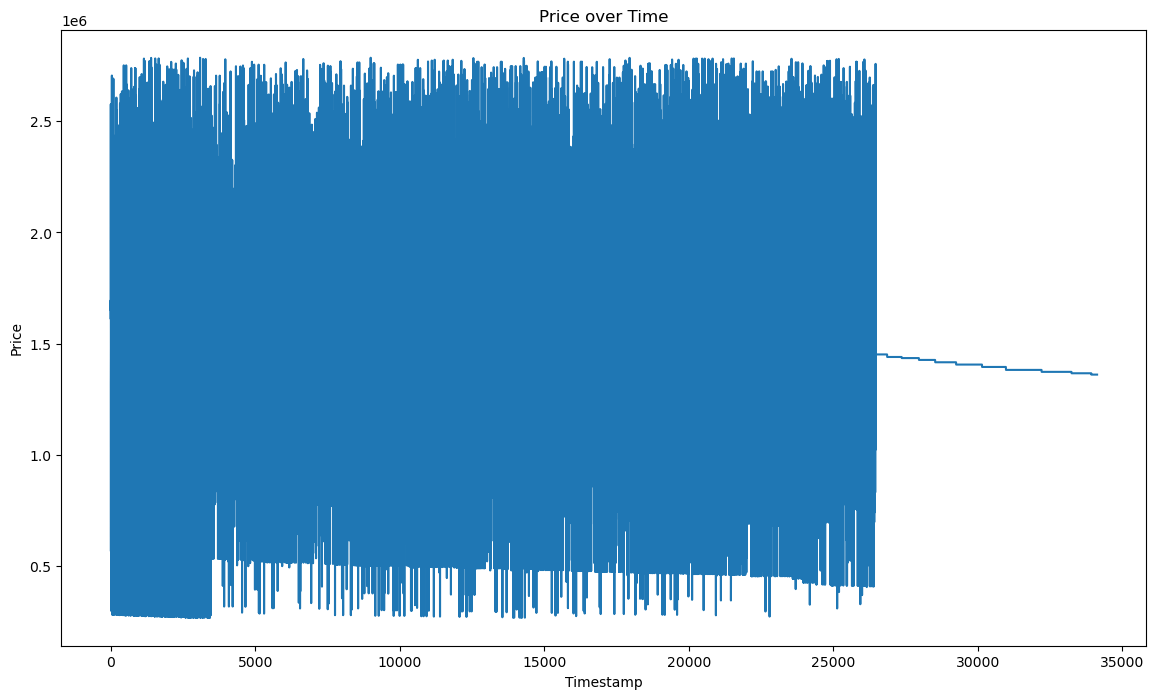

In [541]:
timestampPricePlot(test_df)

In [128]:
year_price = test_df[test_df['price'] == 7118500.41].

In [109]:
year_price = test_df[test_df['price'] == 7118500.41]['price'].to_frame()

In [117]:
year_price.groupby('timestamp').mean()

,price
timestamp,
2015-07-01,7118500.41
2015-07-02,7118500.41
2015-07-03,7118500.41
2015-07-04,7118500.41
2015-07-06,7118500.41
...,...
2016-05-24,7118500.41
2016-05-25,7118500.41
2016-05-26,7118500.41


In [120]:
year_price.reset_index(inplace=True)

In [121]:
year_price

,timestamp,price
0,2015-07-01,7118500.41
1,2015-07-01,7118500.41
2,2015-07-01,7118500.41
3,2015-07-01,7118500.41
4,2015-07-01,7118500.41
...,...,...
7657,2016-05-26,7118500.41
7658,2016-05-28,7118500.41
7659,2016-05-30,7118500.41
7660,2016-05-30,7118500.41


In [621]:
corr_matrix = get_train_corr(df)

In [622]:
price = abs(corr_matrix['price'])

In [528]:
price.sort_values(ascending=False)[1:60]

full_sq                              0.368185
num_room                             0.349099
distance_km                          0.265503
work_male                            0.251729
zd_vokzaly_avto_km                   0.250199
raion_popul                          0.250156
work_all                             0.248734
ekder_male                           0.244741
work_female                          0.244470
school_education_centers_raion       0.243974
ekder_all                            0.243797
ekder_female                         0.242255
ttk_km                               0.238746
0_17_male                            0.236627
0_17_all                             0.236541
0_17_female                          0.236021
young_all                            0.235061
0_6_female                           0.234919
young_male                           0.234892
0_13_all                             0.234878
young_female                         0.234781
7_14_male                         

In [328]:
price.mean()

0.11277338290945578

In [329]:
price.build_year

0.031120811560615386

In [339]:
corr_matrix.workplaces_km[corr_matrix.workplaces_km > 0.6].sort_values(ascending=False)

workplaces_km                        1.000000
basketball_km                        0.894132
university_km                        0.883720
school_km                            0.868374
preschool_km                         0.866570
big_church_km                        0.854596
swim_pool_km                         0.850105
public_healthcare_km                 0.848802
hospice_morgue_km                    0.837581
shopping_centers_km                  0.824799
museum_km                            0.823959
detention_facility_km                0.817456
nuclear_reactor_km                   0.807568
zd_vokzaly_avto_km                   0.807420
office_km                            0.802296
fitness_km                           0.785824
radiation_km                         0.783589
thermal_power_plant_km               0.775257
stadium_km                           0.769344
ttk_km                               0.766504
ice_rink_km                          0.763454
theater_km                        

In [341]:
df.columns[df.columns.str.contains('km$')]

Index(['kindergarten_km', 'school_km', 'park_km', 'green_zone_km',
       'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km',
       'railroad_station_walk_km', 'railroad_station_avto_km',
       'public_transport_station_km', 'water_km', 'mkad_km', 'ttk_km',
       'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'big_road1_km',
       'big_road2_km', 'railroad_km', 'zd_vokzaly_avto_km',
       'bus_terminal_avto_km', 'oil_chemistry_km', 'nuclear_reactor_km',
       'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km',
       'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km',
       'swim_pool_km', 'ice_rink_km', 'stadium_km', 'basketball_km',
       'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km',
       'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km',
       'additional_education_km', 'preschool_km', 'big_church_km',
       'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km',
       'exhib

In [342]:
len(df.columns[df.columns.str.contains('km$')])

51

In [586]:
corr_matrix.distance_km[corr_matrix.distance_km > 0.6].sort_values(ascending=False)

distance_km             1.000000
ttk_km                  0.930616
zd_vokzaly_avto_km      0.920309
sadovoe_km              0.920108
bulvar_ring_km          0.916046
kremlin_km              0.909368
metro_km_avto           0.761029
metro_min_walk          0.757115
metro_km_walk           0.757115
metro_min_avto          0.745645
bus_terminal_avto_km    0.643979
Name: distance_km, dtype: float64

In [620]:
build = df.columns[df.columns.str.contains('build')]

In [624]:
price[build].sort_values(ascending=False)

build_count_1971-1995                    0.132545
build_count_panel                        0.111610
build_count_monolith                     0.099887
build_count_after_1995                   0.076211
raion_build_count_with_builddate_info    0.061068
raion_build_count_with_material_info     0.061033
build_count_brick                        0.051892
build_count_block                        0.045272
build_count_mix                          0.030715
build_count_foam                         0.027733
build_count_slag                         0.027716
build_count_frame                        0.026337
build_count_1921-1945                    0.026289
build_year                               0.025860
build_count_1946-1970                    0.020197
build_count_wood                         0.017834
build_count_before_1920                  0.005383
Name: price, dtype: float64

In [358]:
corr_matrix

0.14815498124107576

In [535]:
columns.append('price')

In [543]:
columns.append('timestamp')

In [590]:
test_df = df[columns]

In [591]:
test_df

,full_sq,num_room,state,work_all,distance_km,mkad_km,price,timestamp
0,43.00,2.0,2.0,98207,3.505510,1.422391,1652542.37,2011-08-20
1,34.00,2.0,2.0,70194,2.837134,9.503405,1694915.25,2011-08-23
2,43.00,2.0,2.0,63388,2.571724,5.604800,1610169.49,2011-08-27
3,67.00,2.0,2.0,29660,2.553136,8.296087,2576443.94,2011-09-06
5,44.00,2.0,2.0,98207,3.592259,1.042291,566251.42,2011-09-09
...,...,...,...,...,...,...,...,...
34122,52.20,2.0,2.0,100062,3.274580,4.292391,1360569.65,2016-05-26
34123,54.09,2.0,2.0,8910,12.842405,11.751277,1360569.65,2016-05-28
34124,41.08,1.0,1.0,43921,2.175616,13.917815,1360569.65,2016-05-30
34125,34.80,1.0,2.0,104635,3.113285,1.490602,1360569.65,2016-05-30


In [592]:
test = test_df[test_df.timestamp >= '2015-07-01']

In [593]:
test.drop('timestamp', axis=1, inplace=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_19864\2940646429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop('timestamp', axis=1, inplace=True)


In [594]:
train = test_df[test_df.timestamp < '2015-07-01']

In [595]:
train.drop('timestamp', axis=1, inplace=True) 

C:\Users\User\AppData\Local\Temp\ipykernel_19864\3564538809.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('timestamp', axis=1, inplace=True)


## learning

In [596]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [597]:
y_train = train['price'].copy()
x_train = train.drop('price', axis=1)

In [598]:
y_test = test['price'].copy()
x_test = test.drop('price', axis=1)

In [599]:
scaler = StandardScaler()

In [600]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [601]:
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [602]:
y_train = np.log1p(y_train)

In [603]:
y_test = np.log1p(y_test)

In [604]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [605]:
reg = LinearRegression()

In [606]:
reg.fit(x_train, y_train)

LinearRegression()

In [607]:
y_pred = reg.predict(x_test)

In [608]:
mse = mean_squared_error(y_test, y_pred)

In [609]:
print('Mean Squared Error:', mse)

Mean Squared Error: 0.04503143195544742


In [610]:
score = reg.score(x_test, y_test)

In [611]:
print('Score:', score)

Score: -124.51368850157499


In [612]:
from sklearn.ensemble import RandomForestRegressor

In [613]:
forest = RandomForestRegressor()

In [614]:
forest.fit(x_train, y_train)

RandomForestRegressor()

In [615]:
y_pred = forest.predict(x_test)

In [616]:
mse = mean_squared_error(y_test, y_pred)

In [617]:
print('Mean Squared Error:', mse)

Mean Squared Error: 0.08143356517384005


In [618]:
forest.score(x_test, y_test)

-225.97539671655136

In [579]:
category_col = df.columns[df.dtypes == 'object']
category_col

Index(['product_type', 'sub_area', 'culture_objects_top_25',
       'thermal_power_plant_raion', 'incineration_raion',
       'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion',
       'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion',
       'water_1line', 'big_road1_1line', 'railroad_1line', 'ecology'],
      dtype='object')

In [580]:
df[category_col]

,product_type,sub_area,culture_objects_top_25,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,water_1line,big_road1_1line,railroad_1line,ecology
0,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
1,Investment,Nagatinskij Zaton,yes,no,no,no,no,no,no,no,no,no,no,no,excellent
2,Investment,Tekstil'shhiki,no,no,no,no,yes,no,no,no,no,no,no,no,poor
3,Investment,Nizhegorodskoe,no,yes,no,no,yes,no,no,no,no,no,no,no,poor
5,Investment,Bibirevo,no,no,no,no,no,no,no,no,no,no,no,no,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34122,Investment,Kon'kovo,no,no,no,no,yes,no,no,no,no,no,no,no,satisfactory
34123,OwnerOccupier,Poselenie Desjonovskoe,no,no,no,no,no,no,no,no,no,no,no,no,no data
34124,OwnerOccupier,Tverskoe,yes,no,no,no,yes,yes,no,no,yes,no,no,no,excellent
34125,Investment,Orehovo-Borisovo Juzhnoe,no,no,no,no,no,no,yes,no,no,no,no,no,poor


In [581]:
df.ecology.value_counts()

poor            8460
no data         8313
good            7714
excellent       4380
satisfactory    3742
Name: ecology, dtype: int64

In [582]:
df.product_type.value_counts()

Investment       20600
OwnerOccupier    11977
unknown             32
Name: product_type, dtype: int64

In [583]:
df.culture_objects_top_25.value_counts()

no     30556
yes     2053
Name: culture_objects_top_25, dtype: int64

In [585]:
df.sub_area.value_counts()

Poselenie Sosenskoe     2002
Poselenie Vnukovskoe    1945
Nekrasovka              1682
Poselenie Moskovskij    1139
Tverskoe                 754
                        ... 
Krasnosel'skoe            27
Poselenie Mosrentgen      22
Vostochnoe                11
Arbat                     11
Molzhaninovskoe            3
Name: sub_area, Length: 134, dtype: int64